In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
lead_df=pd.read_csv("Leads.csv")

In [3]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Inspect the data
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Preparation and Cleanup

In [6]:
lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
#Checking count of null values 
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

In [9]:
#Checking count of null values 
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking the percentage of missing values
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# We will delete columns having more than 40% missing values as they have too many missing data to find meaningful relation
threshold = len(lead_df) * 0.4
columns_to_drop = lead_df.columns[lead_df.isnull().sum() > threshold]
lead_df = lead_df.drop(columns=columns_to_drop)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [12]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
# Replacing the missing values 
lead_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [14]:
lead_df['City'].value_counts(normalize=True)*100

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

In [15]:
lead_df['Tags'].value_counts(normalize=True)*100

Tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

In [16]:
lead_df['Specialization'].value_counts(normalize=True)*100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

In [17]:
lead_df['Lead Source'].value_counts(normalize=True)*100

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64

In [18]:
lead_df['Country'].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

In [19]:
lead_df['What is your current occupation'].value_counts(normalize=True)*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [20]:
lead_df['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: proportion, dtype: float64

In [21]:
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

## Observations
#### 29 % of data is missing and values are very skewed, we will drop the column 'What matters most to you in choosing a course'
#### City has 39.7 % missing data and data is skewed in favour of cities in Maharashtra, it will not provide meaningful insight and can be dropped
#### We can create new category "others" for missing values in specialisation
#### Replace missing values in 'Lead Source' with Google as it is most common source, and creating value others for Lead Source which doesn't have much values
#### For missing tags, we will replace null values with "Not specified"
#### Country will be divided between India, outside india and not specified
#### Will replaced missing values in current occupation with Unemployed as that's the most common response among all available data
####  For column " Last activity", we can replace missing values with "email opened " as it is most common response and missing values are very less


In [22]:
lead_df.drop(['City','What matters most to you in choosing a course'],axis=1,inplace=True)

In [23]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

In [24]:
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [25]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Not Specified')

In [26]:
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [27]:
lead_df['Last Activity']=lead_df['Last Activity'].replace(np.nan,'Email Opened')

In [28]:
lead_df['Country'] = lead_df['Country'].fillna('not provided')
def slots(x):
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df['Country'] = lead_df.apply(lambda x:slots(x['Country']), axis = 1)
lead_df['Country'].value_counts()

Country
India            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [29]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Country                                     0.00
Last Activity       

In [30]:
# Treating missing numerical columns by dropping missing values as missing values is less than 2%
lead_df.dropna(inplace = True)

In [31]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [32]:
# Prospect ID and Lead number are both unique value and don't provide meaning full insight, hence it can be dropped
lead_df.drop(['Prospect ID', 'Lead Number'], axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


# Univariate and Bivariate EDA

In [33]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Country                                   9103 non-null   object 
 10  Specialization                           

In [34]:
# Percentage of lead converted
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

38.02043282434362

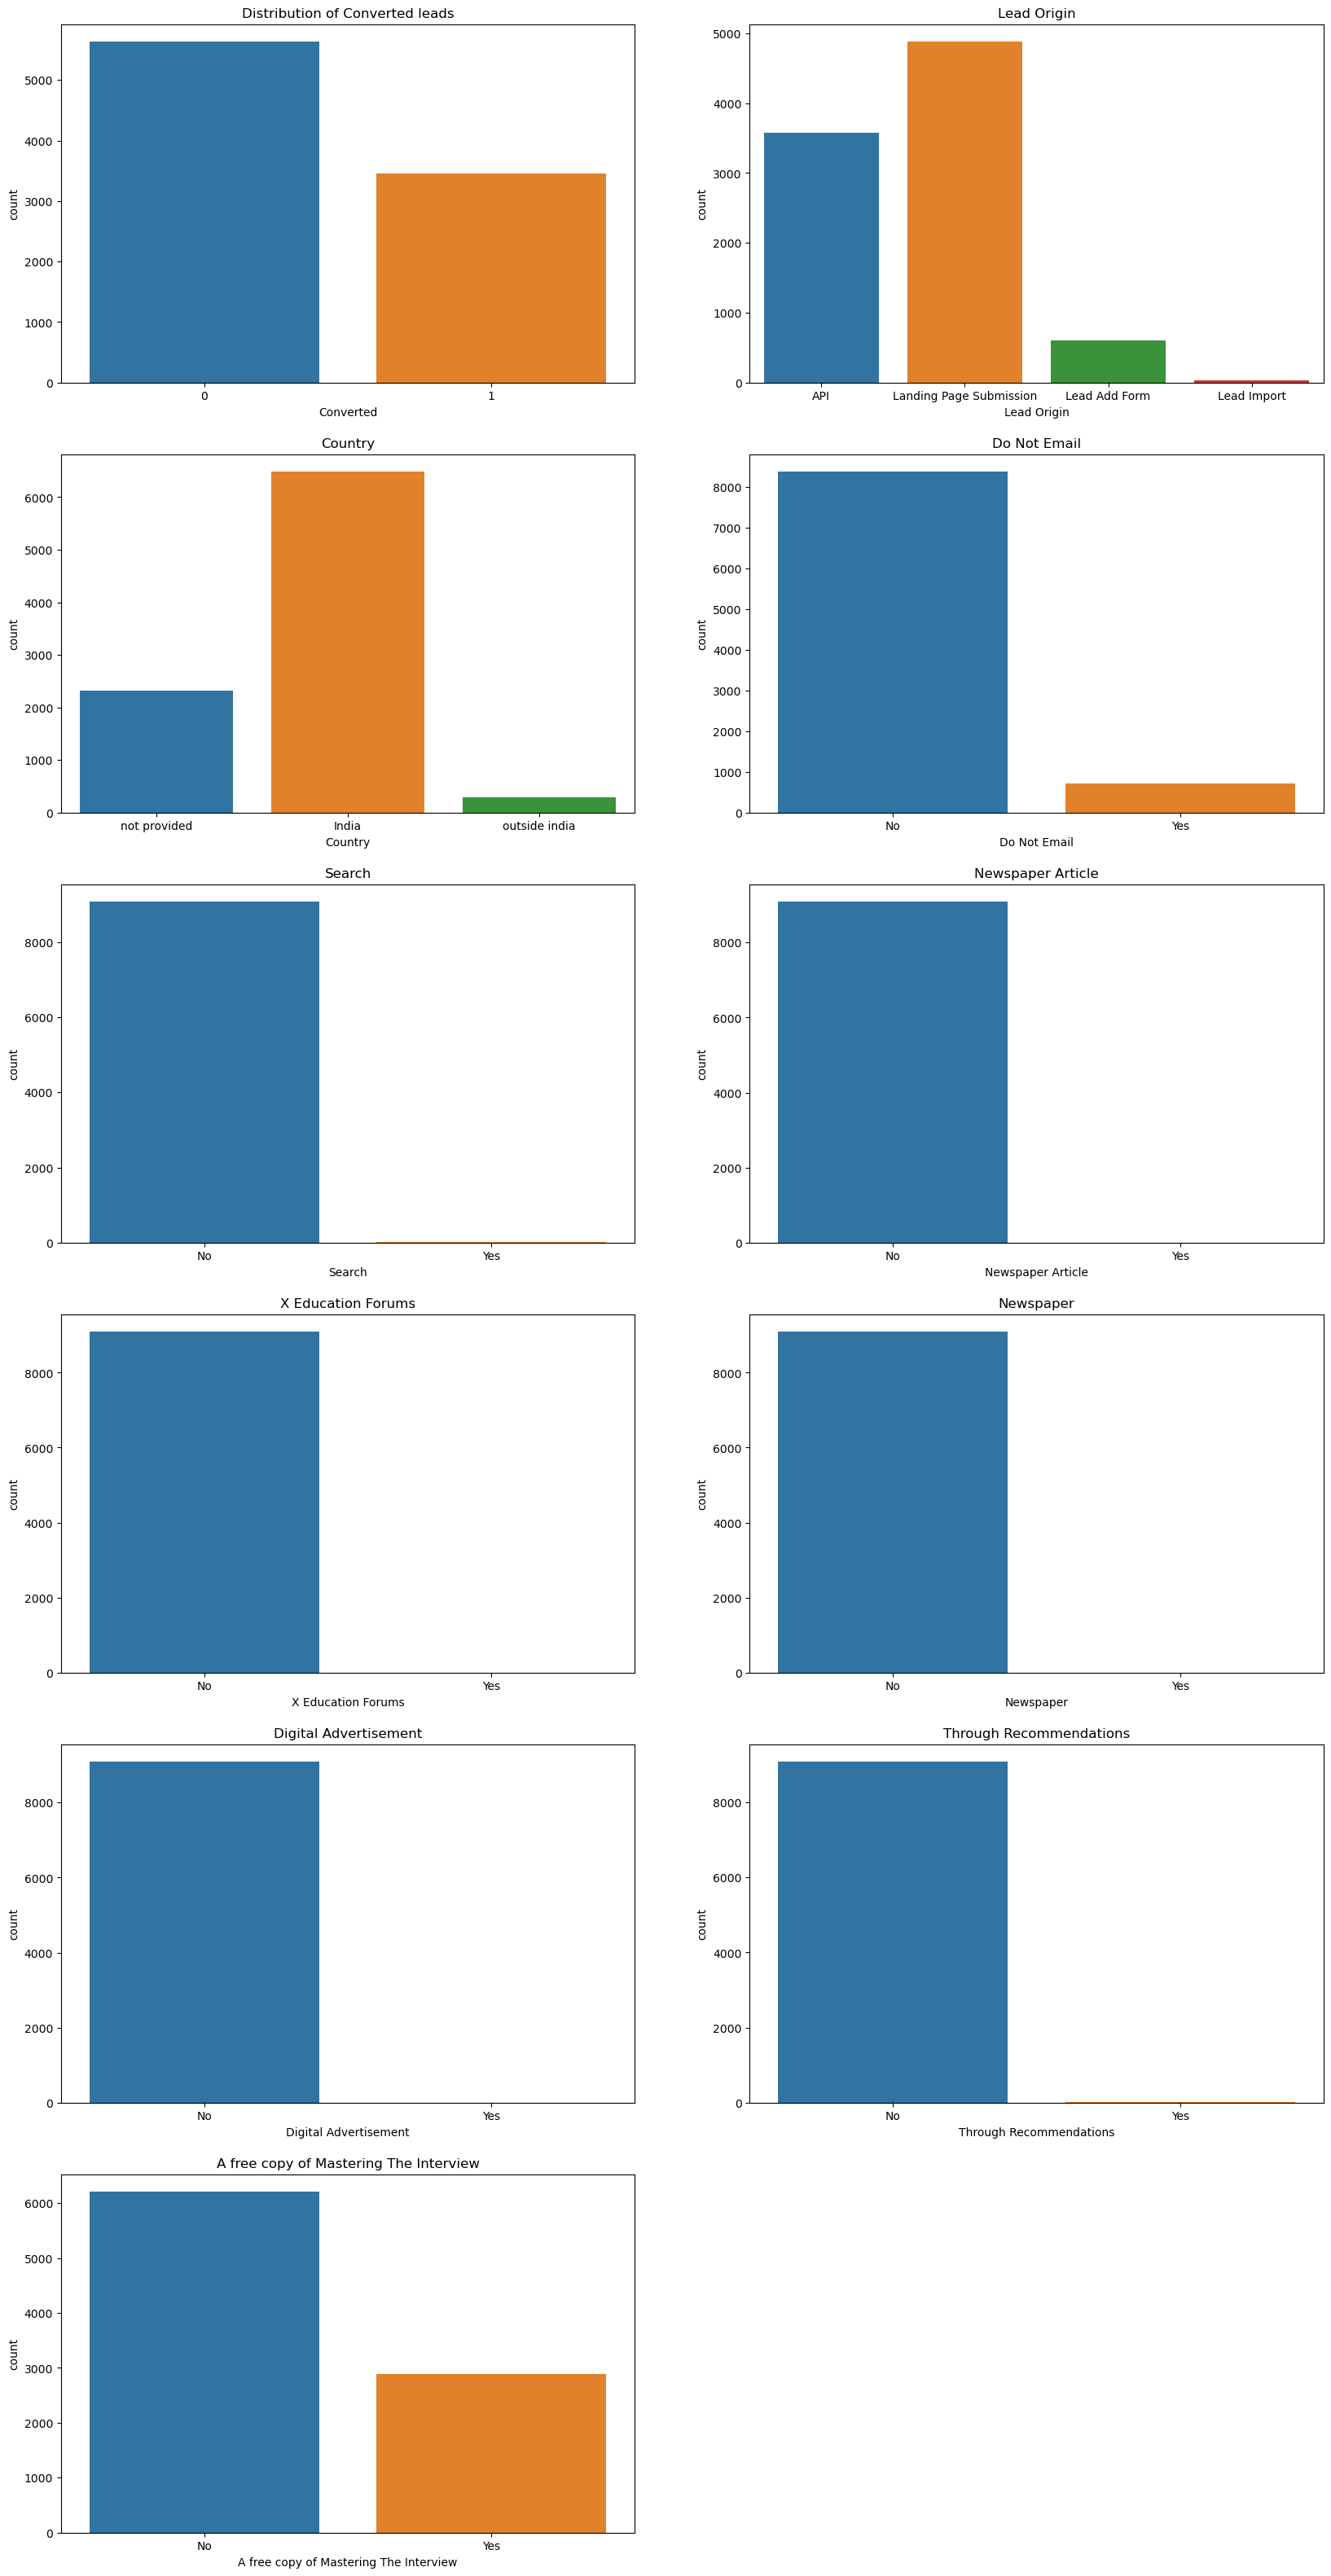

In [35]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(data=lead_df,x='Converted')
plt.title("Distribution of Converted leads")

plt.subplot(6,2,2)
sns.countplot(data=lead_df,x='Lead Origin')
plt.title('Lead Origin')

plt.subplot(6,2,3)
sns.countplot(data=lead_df,x='Country')
plt.title('Country')

plt.subplot(6,2,4)
sns.countplot(data=lead_df,x='Do Not Email')
plt.title('Do Not Email')


plt.subplot(6,2,5)
sns.countplot(data=lead_df,x='Search')
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(data=lead_df,x='Newspaper Article')
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(data=lead_df,x='X Education Forums')
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(data=lead_df,x='Newspaper')
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(data=lead_df,x='Digital Advertisement')
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(data=lead_df,x='Through Recommendations')
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(data=lead_df,x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')
plt.show()

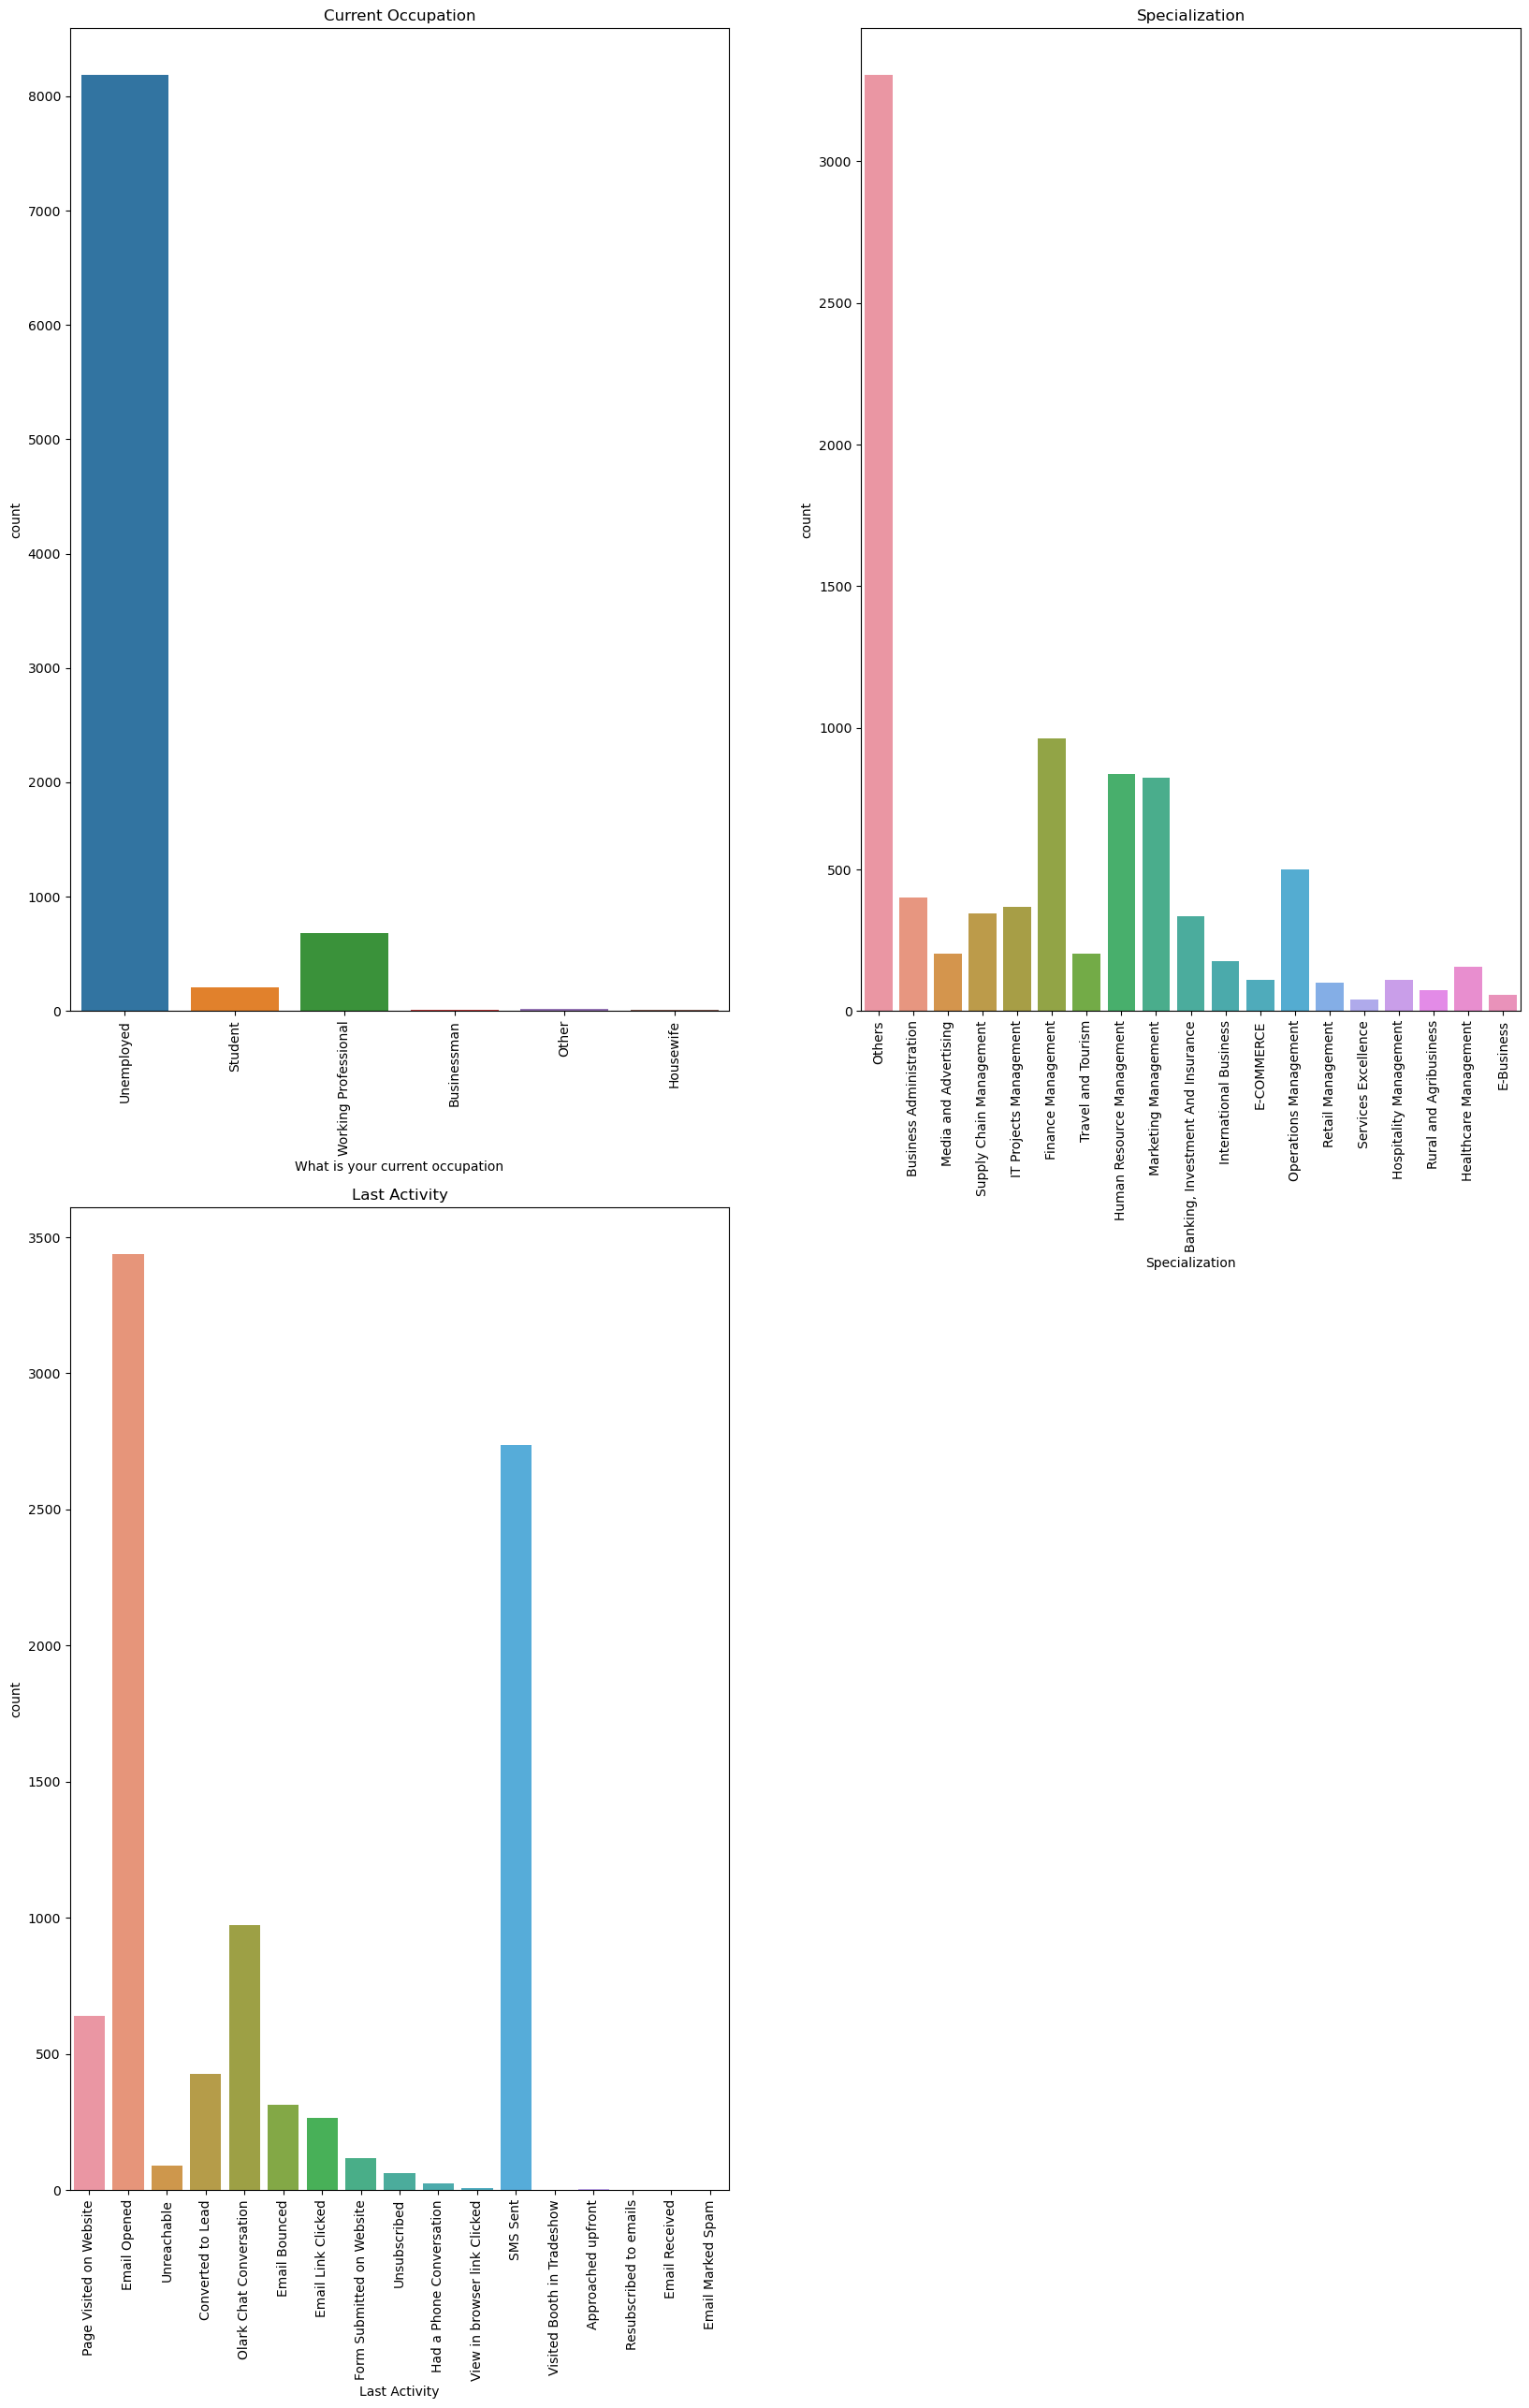

In [36]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(data=lead_df,x='What is your current occupation').tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(data=lead_df,x='Specialization').tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,3)
sns.countplot(data=lead_df,x='Last Activity').tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [37]:
# Combing values having less value count to create new value derived
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

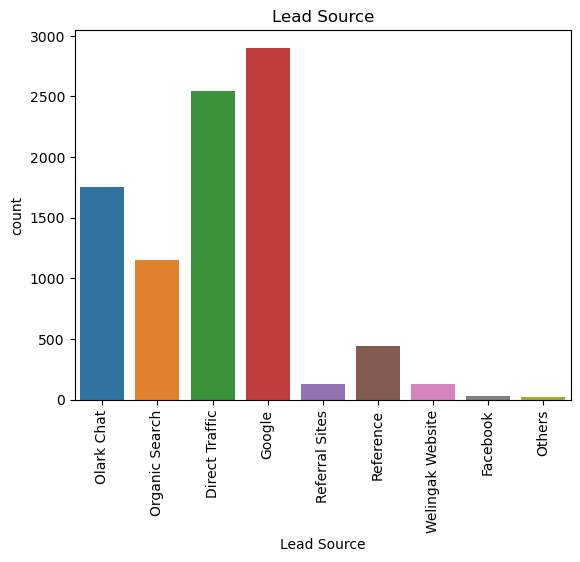

In [38]:
sns.countplot(data=lead_df,x='Lead Source').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

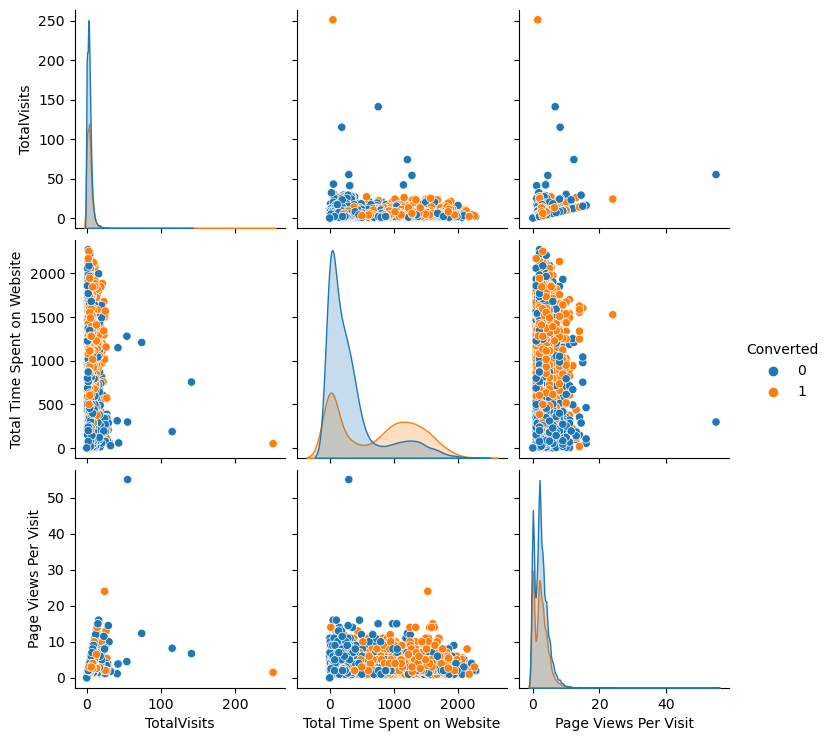

In [39]:

sns.pairplot(lead_df,diag_kind='kde',hue='Converted')
plt.show()

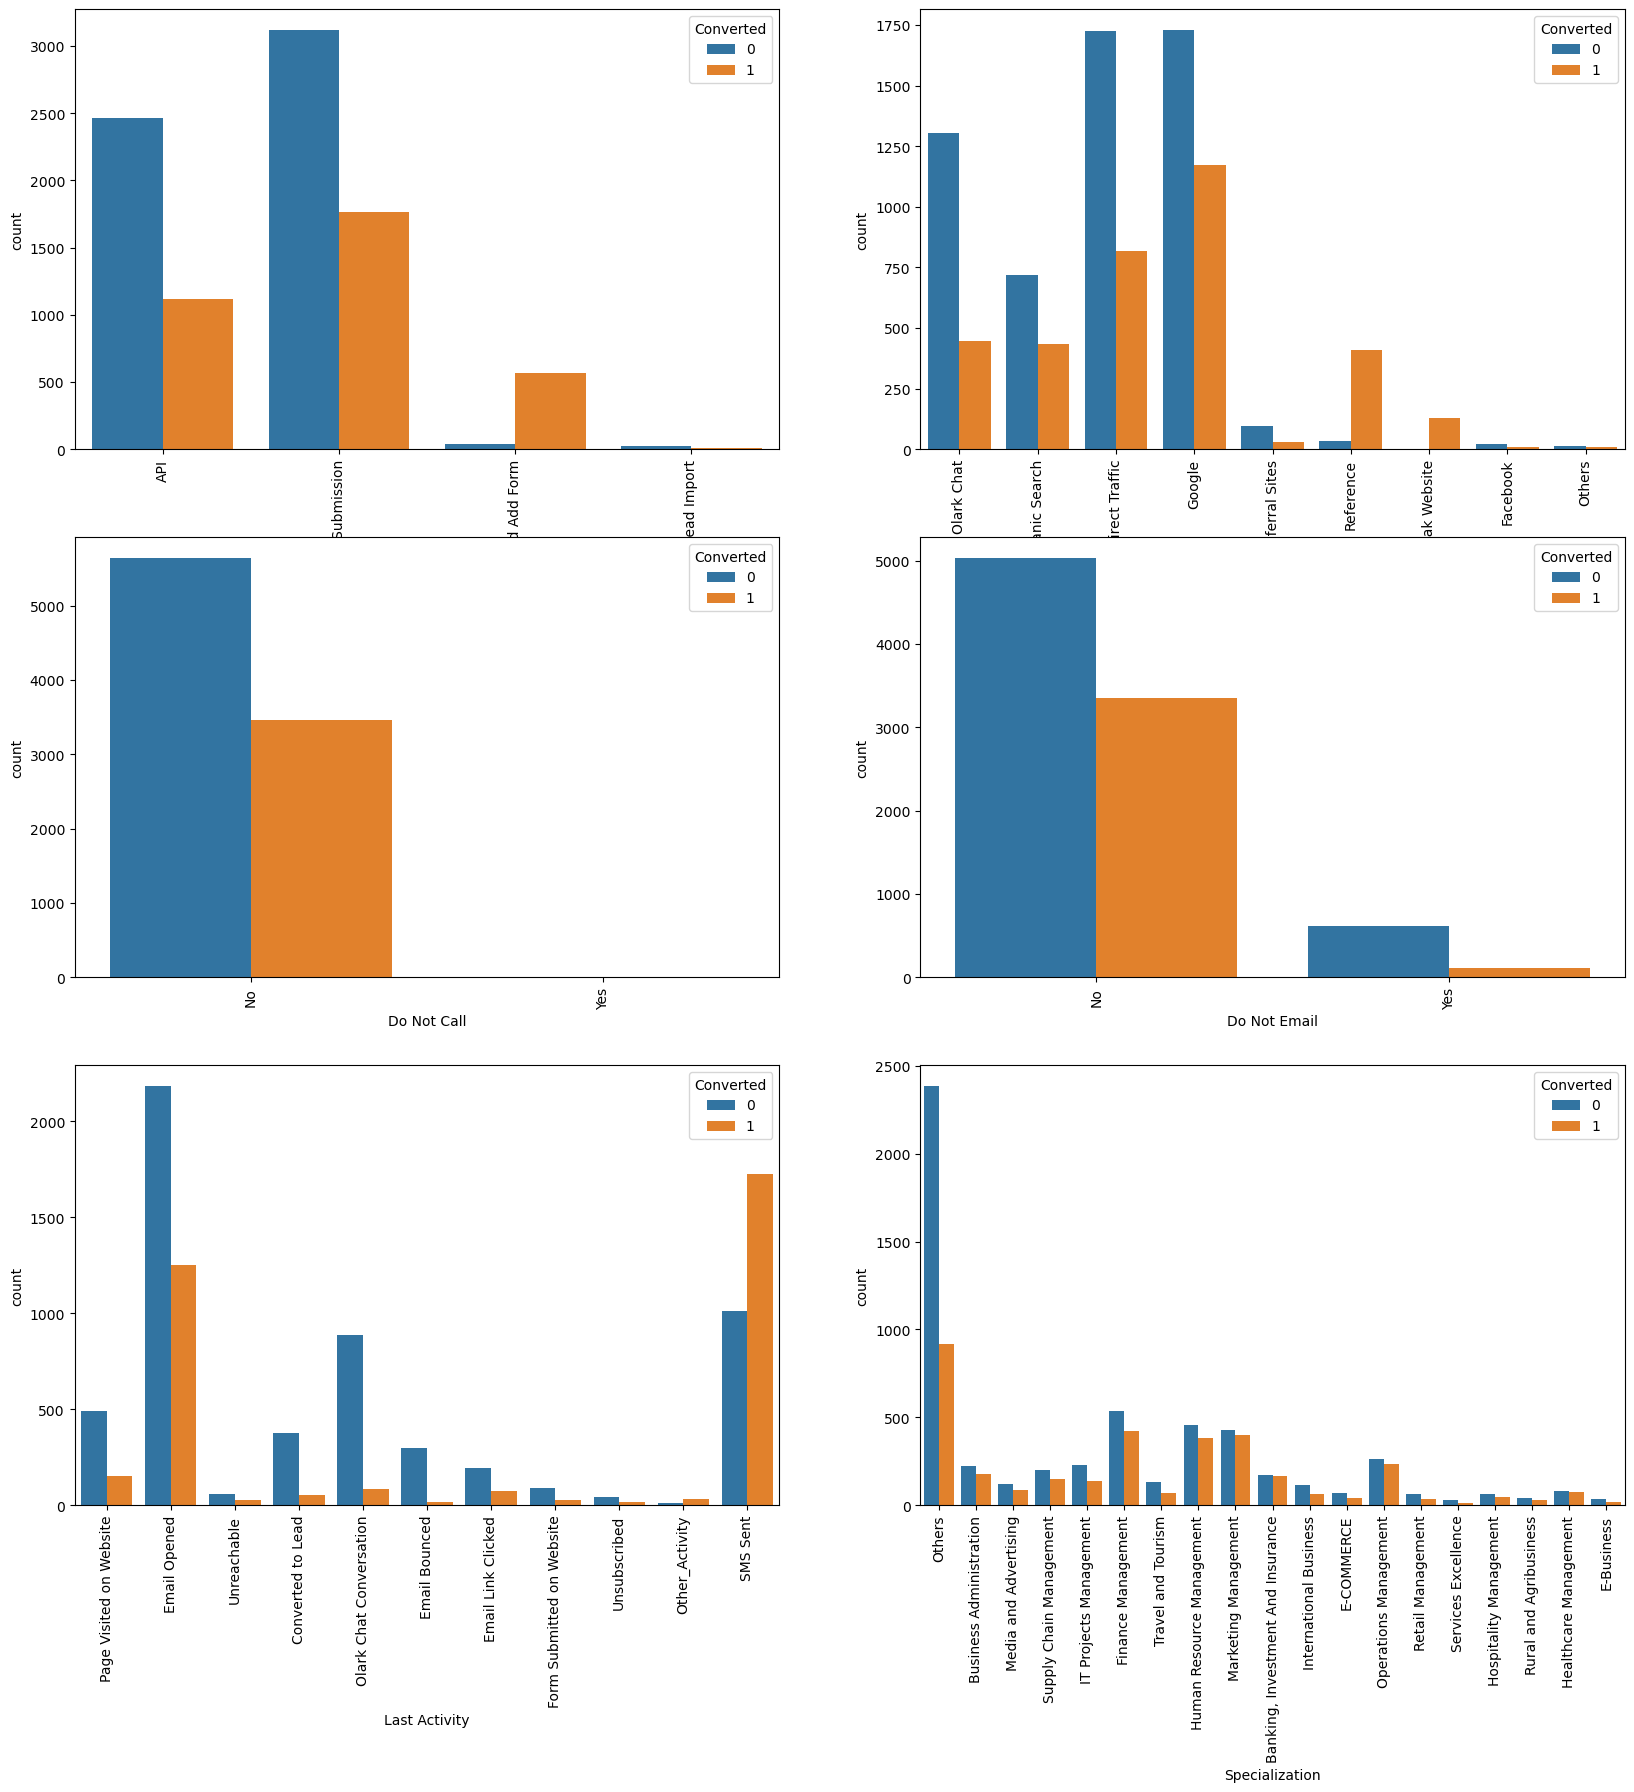

In [40]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,3)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,4)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,5)
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,6)
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.show()


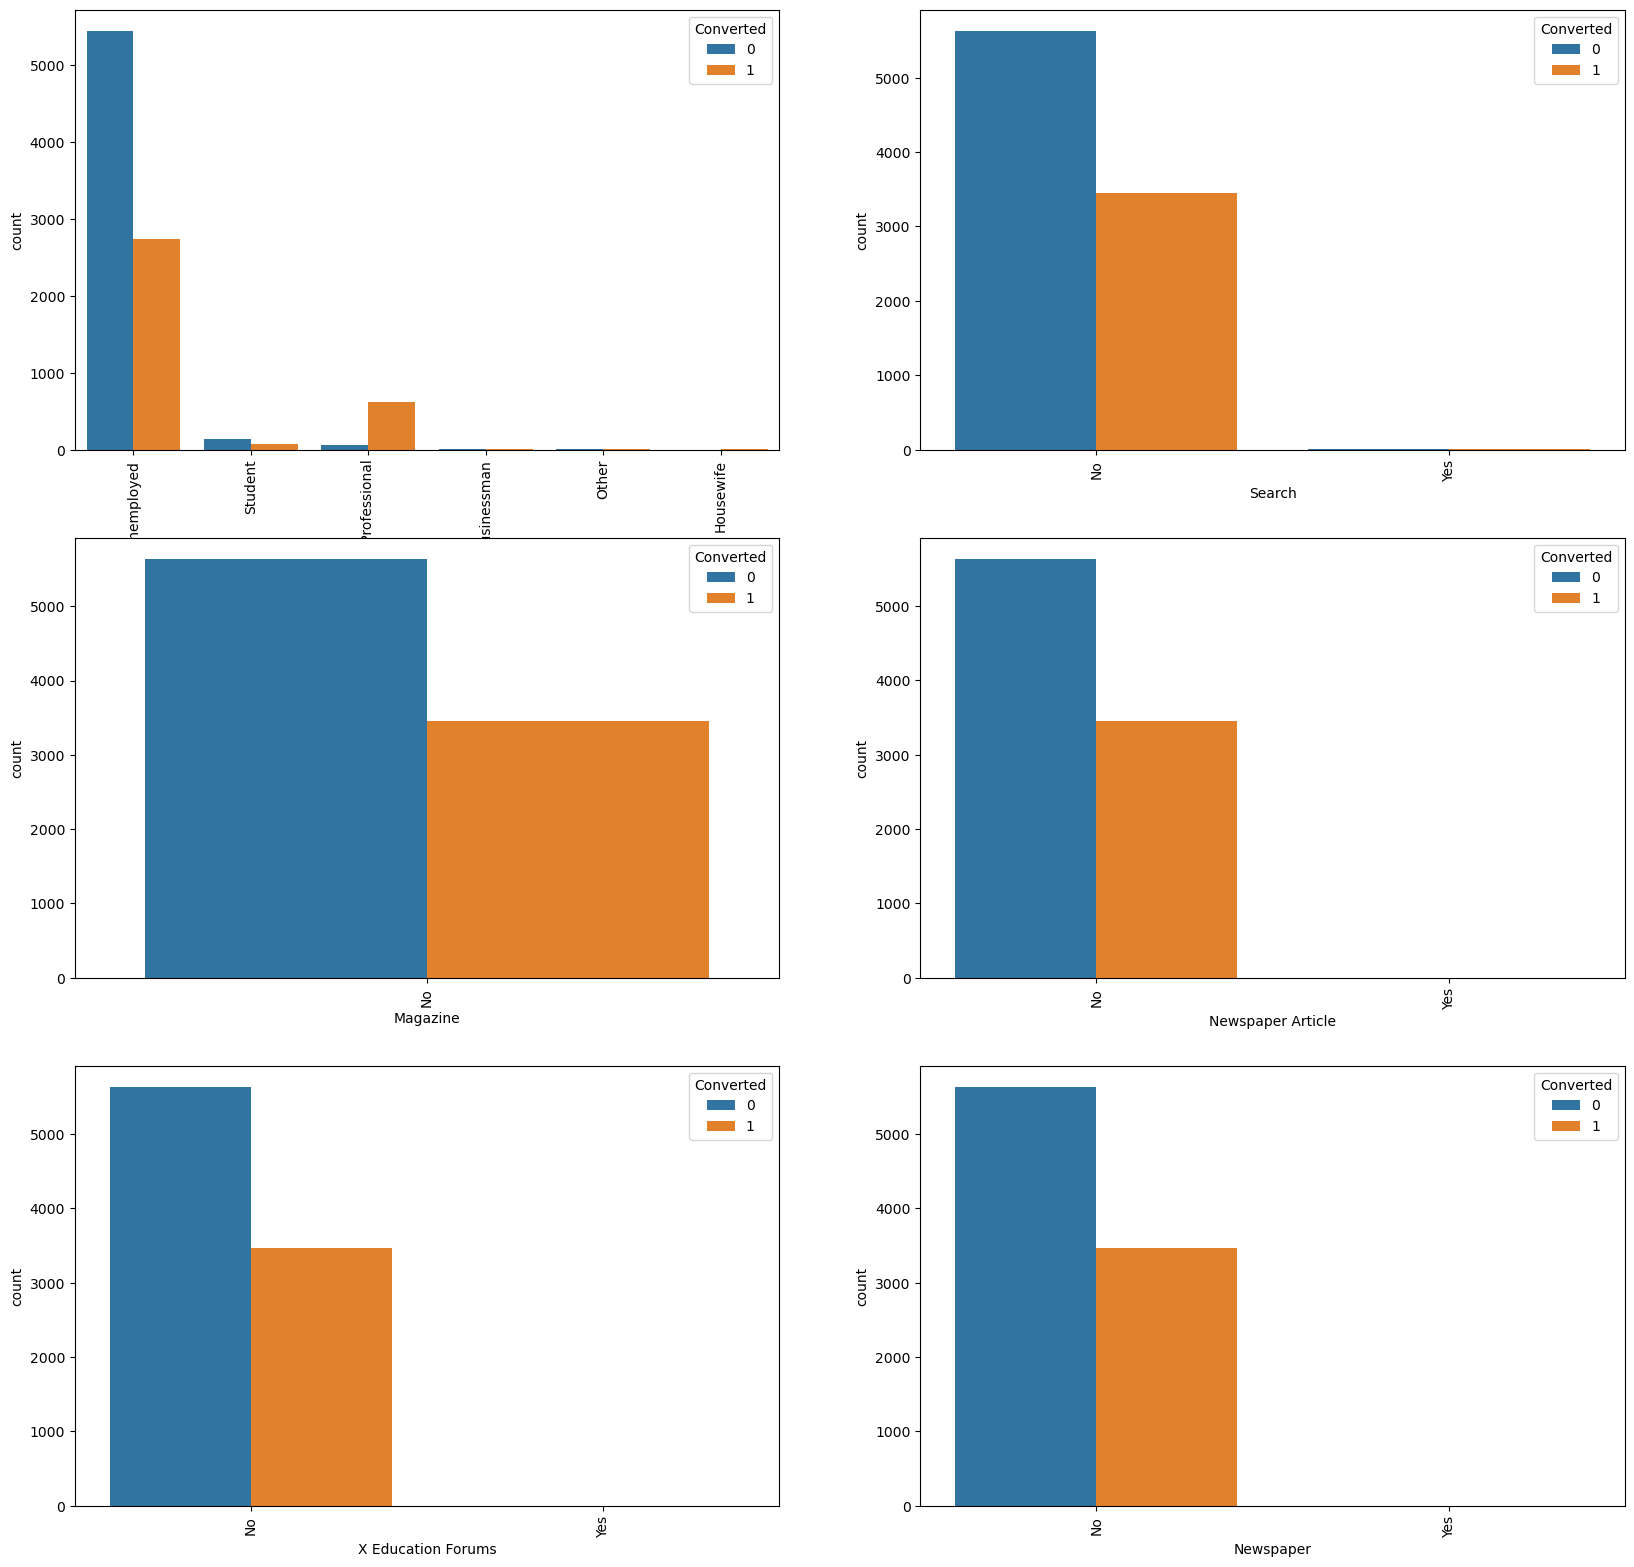

In [41]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,2)
sns.countplot(x = "Search", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,3)
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,4)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,5)
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,6)
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.show()


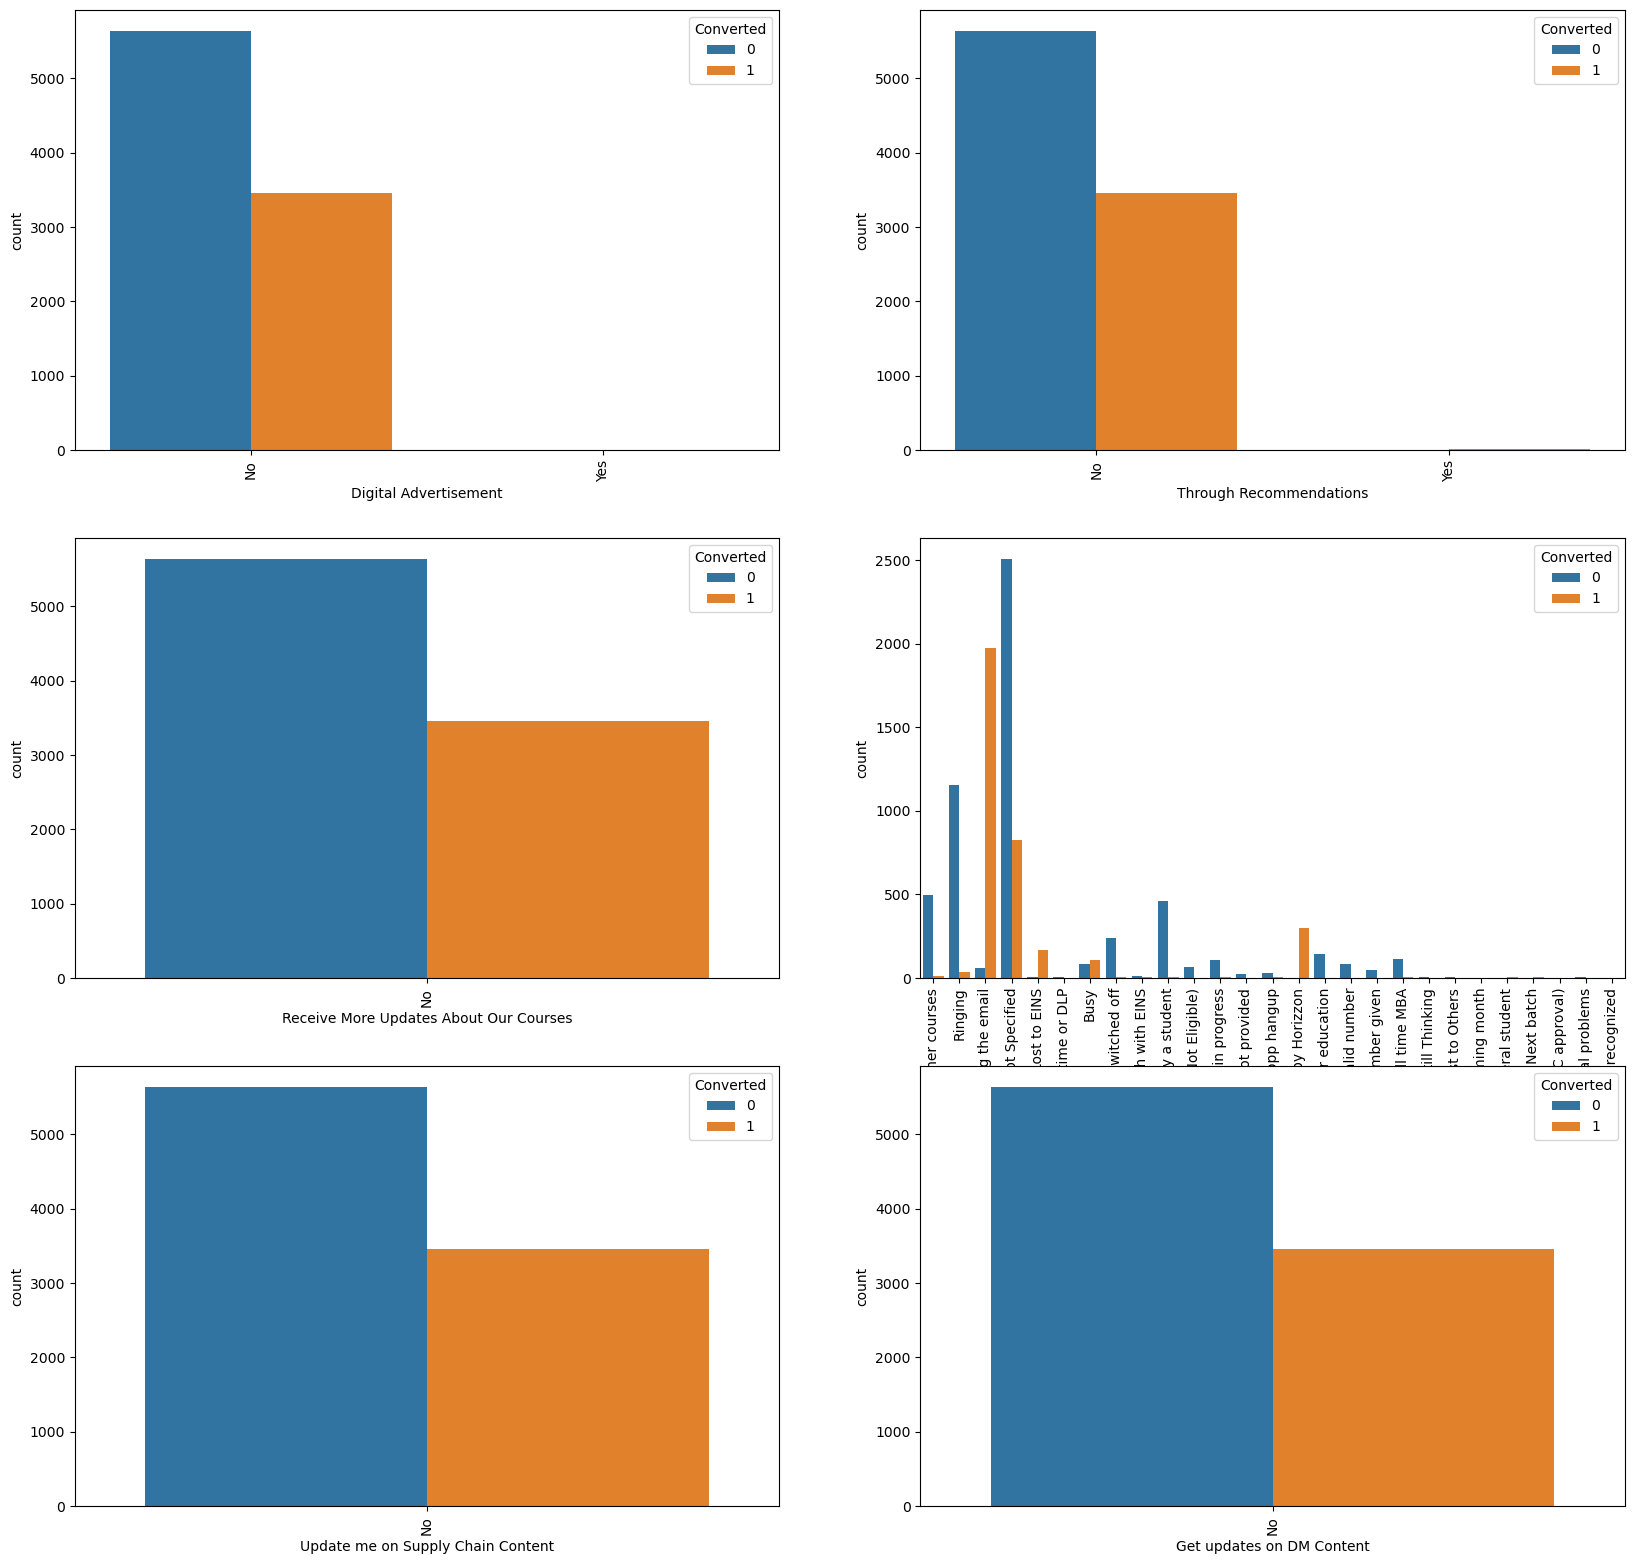

In [42]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,1)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,2)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,3)
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,4)
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,5)
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.subplot(6,2,6)
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

plt.show()


## Inferences
From above plots we can observe and calculate that :

Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
Count of 'Lead Import' is lesser.
Recommendation
To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

From above plot we can observe:

Google and Direct traffic generates maximum number of leads.
Conversion rate of 'Reference' and 'Welingak Website' leads is high.
Recommendation
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.
Columns which is not providing meaningful insights can be dropped

In [43]:
# Based on univariate analysis, we will drop columns not providing meaningful insight
lead_df = lead_df.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [44]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified


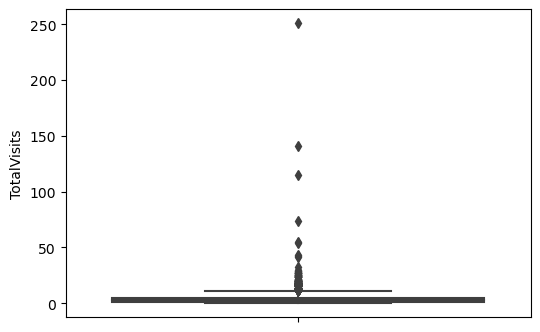

In [45]:
# Numerical value analysis
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [46]:
#Outlier treatment
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [47]:
# Cap outlier by removing top and bottom 5 percentile
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

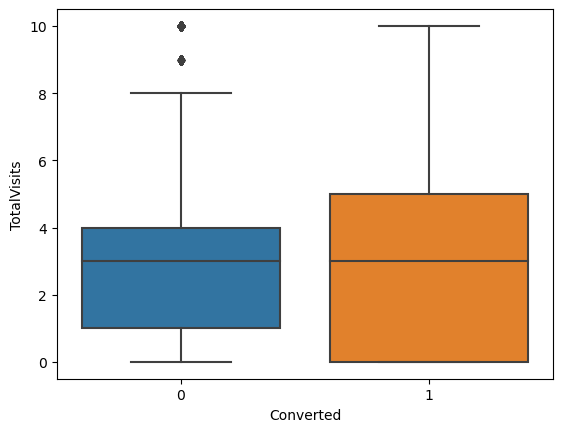

In [48]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

In [49]:
lead_df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

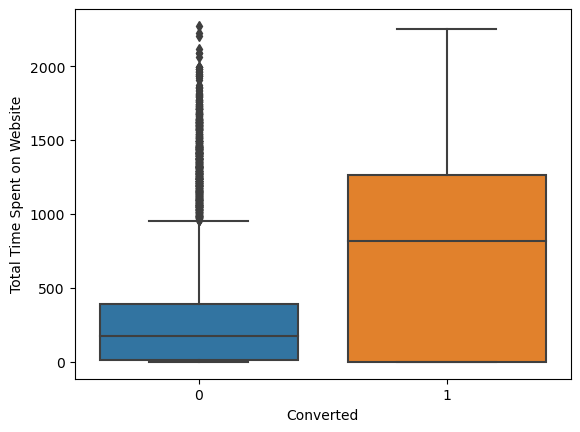

In [50]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.show()

Leads spending more time on the weblise are more likely to be converted.

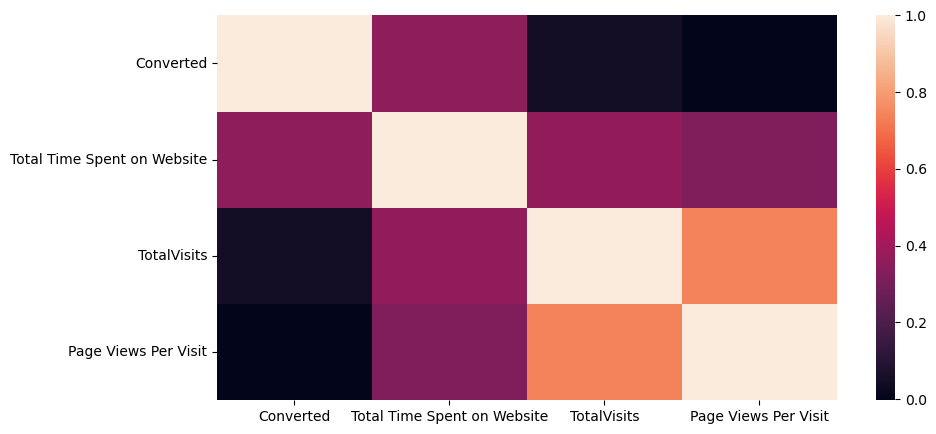

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(lead_df[['Converted','Total Time Spent on Website','TotalVisits','Page Views Per Visit']].corr())
plt.show()

In [52]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

## Dummy variable

In [53]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Do Not Call                      9103 non-null   int64  
 4   Converted                        9103 non-null   int64  
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9103 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Last Activity                    9103 non-null   object 
 9   Specialization                   9103 non-null   object 
 10  What is your current occupation  9103 non-null   object 
 11  Last Notable Activity            9103 non-null   object 
dtypes: float64(2), int64(4), 

In [54]:
#Fetching list of categorical column
categorical_col= lead_df.select_dtypes(include=['object']).columns
categorical_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [55]:
dummy = pd.get_dummies(lead_df[['Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity']],dtype='int', drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
lead_df = pd.concat([lead_df, dummy], axis=1)
lead_df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Other_Activity,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [57]:
lead_df = lead_df.drop(['Lead Origin','Specialization' ,'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'],axis=1)
lead_df

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.00,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.00,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.00,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.00,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,8.0,1845,2.67,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,2.0,238,2.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,2.0,199,2.00,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,0,0,1,3.0,499,3.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test train split of data

In [58]:
y = lead_df['Converted']

X=lead_df.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6372 entries, 7962 to 5734
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6372 non-null   int64  
 1   Do Not Call                                           6372 non-null   int64  
 2   TotalVisits                                           6372 non-null   float64
 3   Total Time Spent on Website                           6372 non-null   int64  
 4   Page Views Per Visit                                  6372 non-null   float64
 5   Lead Origin_Landing Page Submission                   6372 non-null   int32  
 6   Lead Origin_Lead Add Form                             6372 non-null   int32  
 7   Lead Origin_Lead Import                               6372 non-null   int32  
 8   Specialization_Business Administration                6372 n

## Scaling

In [62]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,-0.068258,1.476324,-0.394072,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,1.362470,-0.771066,2.111481,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.647106,-0.571257,0.061483,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,2.435517,1.393834,0.517039,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-1.141305,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


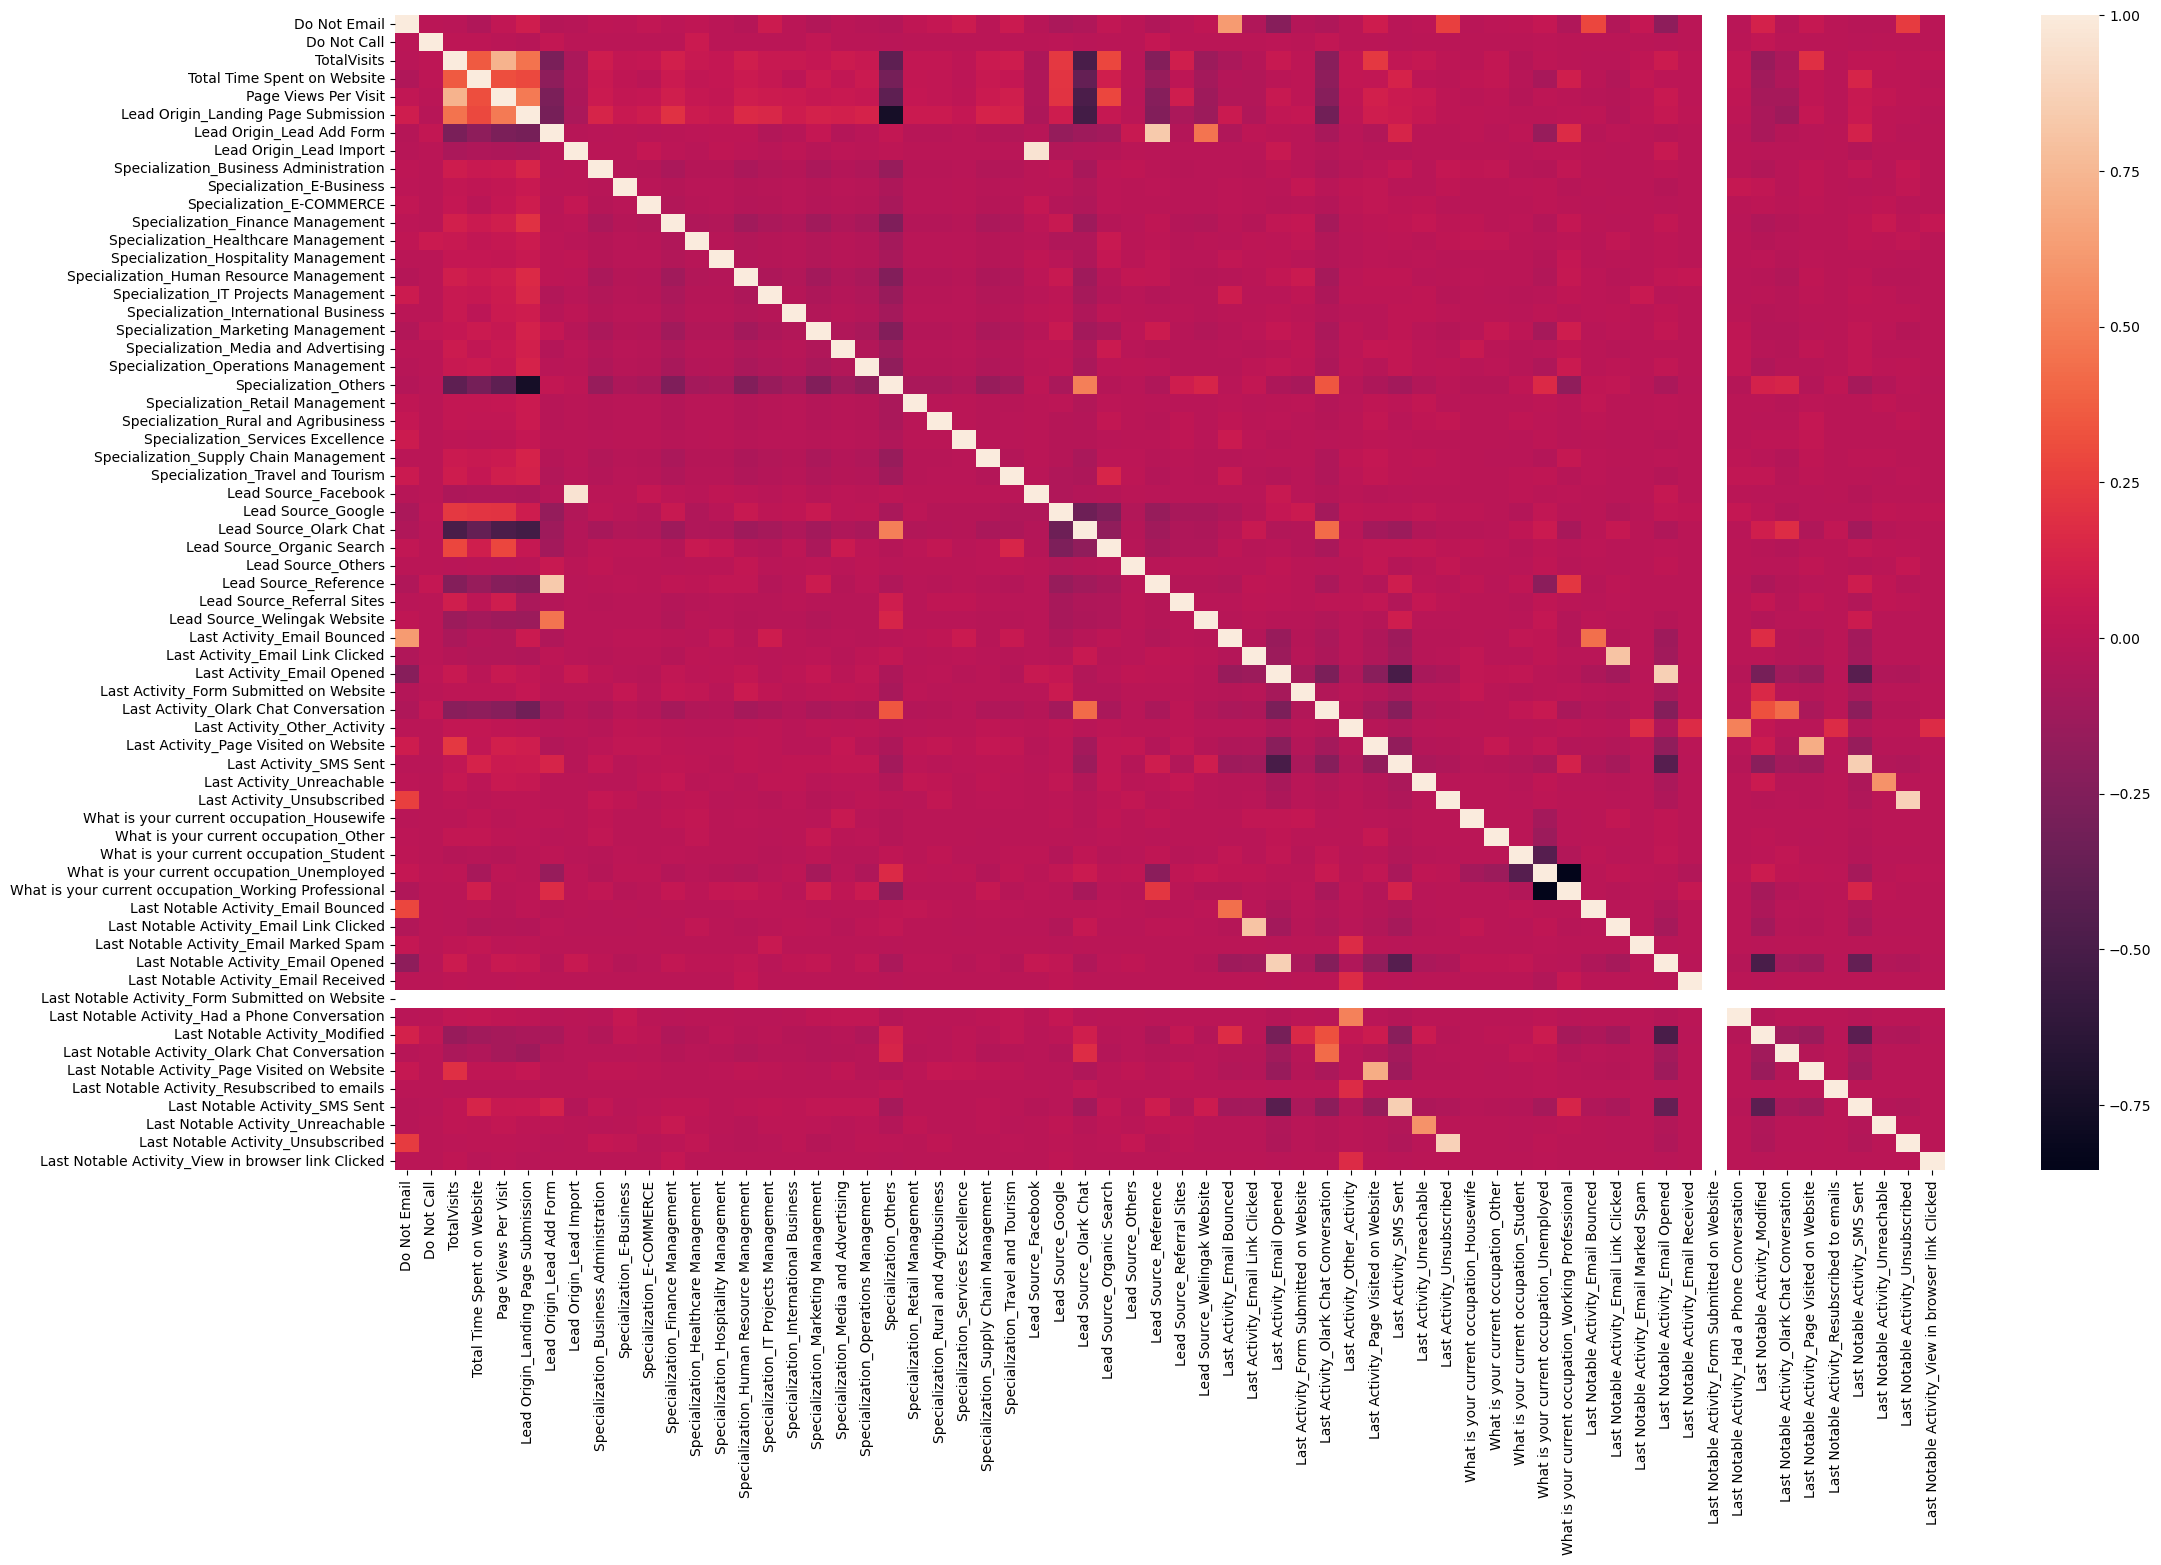

In [63]:
# To check the correlation among varibles
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr())
plt.show()

## Model Building

In [64]:
logreg = LogisticRegression()

In [65]:
# Running RFE with 15 variable
rfe = RFE(estimator=logreg,n_features_to_select= 15)


In [66]:
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Specialization_Business Administration', False, 36),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 38),
 ('Specialization_Healthcare Management', False, 30),
 ('Specialization_Hospitality Management', False, 9),
 ('Specialization_Human Resource Management', False, 37),
 ('Specialization_IT Projects Management', False, 46),
 ('Specialization_International Business', False, 29),
 ('Specialization_Marketing Management', False, 49),
 ('Specialization_Media and Advertising', False, 31),
 ('Specialization_Operations Management', False, 35),
 ('Specialization_Others', True, 1),
 ('Specialization_Retail Management

In [68]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_Others', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [69]:
# Model 1
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.5
Date:                Sun, 16 Jun 2024   Deviance:                       5302.9
Time:                        12:49:43   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4930      0.120     -4.109      0.000      -0.728      -0.258
Do Not Email                                            -1.5475      0.174     -8.870      0.000      -1.889      -1.206
Total Time Spent on Website                              1.0751      0.039     27.263      0.000       0.998       1.152
Lead Origin_Landing Page Submission                     -0.9908      0.124     -7.981      0.000      -1.234      -0.747
Lead Origin_Lead Add Form                                3.5059      0.236     14.861      0.000       3.044       3.968
Specialization_Others                                   -1.0129      0.120     -8.443      0.000      -1.248      -0.778
Lead Source_Olark Chat                                   1.0123      0.121      8.350      0.000       0.775       1.250
Lead Source_Welingak Website                             2.4648      0.758      3.250      0.001       0.978       3.951
Last Activity_Olark Chat Conversation                   -1.3736      0.165     -8.334      0.000      -1.697      -1.051
Last Activity_Other_Activity                             1.1941      0.485      2.460      0.014       0.243       2.145
Last Activity_Unsubscribed                               1.1963      0.463      2.581      0.010       0.288       2.105
What is your current occupation_Housewife               23.2679   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.6245      0.189     13.854      0.000       2.253       2.996
Last Notable Activity_Had a Phone Conversation           1.7903      1.235      1.449      0.147      -0.631       4.211
Last Notable Activity_SMS Sent                           1.6177      0.079     20.402      0.000       1.462       1.773
Last Notable Activity_Unreachable                        1.7372      0.510      3.409      0.001       0.738       2.736
========================================================================================================================
"""

In [70]:
# Dropping the column 'What is your current occupation_Housewife' since it has very high p value
col1 = cols.drop('What is your current occupation_Housewife')

In [71]:
#Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.4
Date:                Sun, 16 Jun 2024   Deviance:                       5316.8
Time:                        12:49:43   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4867      0.120     -4.063      0.000      -0.722      -0.252
Do Not Email                                            -1.5515      0.174     -8.899      0.000      -1.893      -1.210
Total Time Spent on Website                              1.0745      0.039     27.283      0.000       0.997       1.152
Lead Origin_Landing Page Submission                     -0.9871      0.124     -7.964      0.000      -1.230      -0.744
Lead Origin_Lead Add Form                                3.5085      0.236     14.880      0.000       3.046       3.971
Specialization_Others                                   -1.0165      0.120     -8.482      0.000      -1.251      -0.782
Lead Source_Olark Chat                                   1.0110      0.121      8.344      0.000       0.774       1.249
Lead Source_Welingak Website                             2.4618      0.758      3.246      0.001       0.975       3.948
Last Activity_Olark Chat Conversation                   -1.3767      0.165     -8.354      0.000      -1.700      -1.054
Last Activity_Other_Activity                             1.1888      0.485      2.449      0.014       0.237       2.140
Last Activity_Unsubscribed                               1.1932      0.463      2.575      0.010       0.285       2.102
What is your current occupation_Working Professional     2.6177      0.189     13.822      0.000       2.247       2.989
Last Notable Activity_Had a Phone Conversation           1.7859      1.235      1.446      0.148      -0.635       4.207
Last Notable Activity_SMS Sent                           1.6107      0.079     20.332      0.000       1.455       1.766
Last Notable Activity_Unreachable                        1.7294      0.510      3.394      0.001       0.731       2.728
========================================================================================================================
"""

In [72]:
# dropping column "Last Notable Activity_Had a Phone Conversation" since it has high p value
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [73]:
#Model 3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.7
Date:                Sun, 16 Jun 2024   Deviance:                       5319.3
Time:                        12:49:43   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3892
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4859      0.120     -4.058      0.000      -0.721      -0.251
Do Not Email                                            -1.5546      0.174     -8.912      0.000      -1.896      -1.213
Total Time Spent on Website                              1.0741      0.039     27.281      0.000       0.997       1.151
Lead Origin_Landing Page Submission                     -0.9859      0.124     -7.959      0.000      -1.229      -0.743
Lead Origin_Lead Add Form                                3.5089      0.236     14.880      0.000       3.047       3.971
Specialization_Others                                   -1.0197      0.120     -8.510      0.000      -1.255      -0.785
Lead Source_Olark Chat                                   1.0101      0.121      8.336      0.000       0.773       1.248
Lead Source_Welingak Website                             2.4641      0.758      3.249      0.001       0.978       3.951
Last Activity_Olark Chat Conversation                   -1.3747      0.165     -8.342      0.000      -1.698      -1.052
Last Activity_Other_Activity                             1.5547      0.430      3.615      0.000       0.712       2.398
Last Activity_Unsubscribed                               1.1960      0.463      2.581      0.010       0.288       2.104
What is your current occupation_Working Professional     2.6125      0.189     13.797      0.000       2.241       2.984
Last Notable Activity_SMS Sent                           1.6106      0.079     20.332      0.000       1.455       1.766
Last Notable Activity_Unreachable                        1.7286      0.510      3.393      0.001       0.730       2.727
========================================================================================================================
"""

In [74]:
# VIF calculation
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.03
4,Specialization_Others,1.95
3,Lead Origin_Lead Add Form,1.54
7,Last Activity_Olark Chat Conversation,1.44
11,Last Notable Activity_SMS Sent,1.41
2,Lead Origin_Landing Page Submission,1.36
6,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.28
0,Do Not Email,1.19
10,What is your current occupation_Working Profes...,1.17


In [75]:
# Dropping the column  'Last Activity_Unsubscribed' since p value >0.05
col1 = col1.drop('Last Activity_Unsubscribed')

In [76]:
#Model 4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.6
Date:                Sun, 16 Jun 2024   Deviance:                       5325.2
Time:                        12:49:43   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4812      0.120     -4.019      0.000      -0.716      -0.247
Do Not Email                                            -1.4346      0.164     -8.731      0.000      -1.757      -1.113
Total Time Spent on Website                              1.0741      0.039     27.294      0.000       0.997       1.151
Lead Origin_Landing Page Submission                     -0.9872      0.124     -7.969      0.000      -1.230      -0.744
Lead Origin_Lead Add Form                                3.5088      0.236     14.852      0.000       3.046       3.972
Specialization_Others                                   -1.0182      0.120     -8.499      0.000      -1.253      -0.783
Lead Source_Olark Chat                                   1.0084      0.121      8.324      0.000       0.771       1.246
Lead Source_Welingak Website                             2.4285      0.757      3.206      0.001       0.944       3.913
Last Activity_Olark Chat Conversation                   -1.3799      0.165     -8.377      0.000      -1.703      -1.057
Last Activity_Other_Activity                             1.5449      0.430      3.593      0.000       0.702       2.387
What is your current occupation_Working Professional     2.6095      0.189     13.819      0.000       2.239       2.980
Last Notable Activity_SMS Sent                           1.5989      0.079     20.256      0.000       1.444       1.754
Last Notable Activity_Unreachable                        1.7248      0.509      3.385      0.001       0.726       2.723
========================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.03
4,Specialization_Others,1.95
3,Lead Origin_Lead Add Form,1.54
7,Last Activity_Olark Chat Conversation,1.44
10,Last Notable Activity_SMS Sent,1.41
2,Lead Origin_Landing Page Submission,1.36
6,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.28
9,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


## Since p values for all variable is less than 0.05 and VIF is less than 3, model 4 is our final model

### Prediction

In [78]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.847632
5520    0.091404
1962    0.043097
1566    0.933280
9170    0.191962
5097    0.191962
8954    0.486526
309     0.130457
5519    0.540301
1050    0.432761
dtype: float64

In [79]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84763236, 0.09140369, 0.04309729, 0.93327957, 0.1919621 ,
       0.1919621 , 0.4865256 , 0.13045705, 0.5403013 , 0.43276136])

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.847632
1,0,0.091404
2,0,0.043097
3,1,0.933280
4,0,0.191962


In [81]:
## Taking cutoff probability as 0.5 for lead conversion
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.847632,1
1,0,0.091404,0
2,0,0.043097,0
3,1,0.933280,1
4,0,0.191962,0


## Model evaluation using confusion matrix

In [82]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3493  460]
 [ 740 1679]]


In [83]:
#Checking accuracy
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8116760828625236


### We got accuracy of 81% , which is good

In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6940884663083919


In [86]:
print("Specifity : ",TN / float(TN+FP))

Specifity :  0.8836326840374399


In [87]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11636731596256009


In [88]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7849462365591398


In [89]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8251830852823057


### Our accuracy 81% was good, with good specificity of 88%. Sensitivity of 70% was not good as we had randomly taken 0.5 as cut off. We will take care of this using ROC

In [90]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

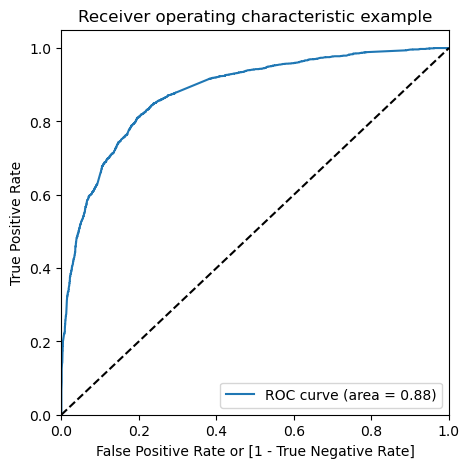

In [92]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Area under ROC is 0.88, which is good, hence our model is good

In [93]:
## Creating column with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.847632,1,1,1,1,1,1,1,1,1,1,0
1,0,0.091404,0,1,0,0,0,0,0,0,0,0,0
2,0,0.043097,0,1,0,0,0,0,0,0,0,0,0
3,1,0.933280,1,1,1,1,1,1,1,1,1,1,1
4,0,0.191962,0,1,1,0,0,0,0,0,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.583804  0.969822  0.347584
0.2   0.2  0.774011  0.875155  0.712117
0.3   0.3  0.796767  0.842910  0.768530
0.4   0.4  0.805712  0.764365  0.831014
0.5   0.5  0.811676  0.694088  0.883633
0.6   0.6  0.802103  0.593220  0.929927
0.7   0.7  0.786409  0.515502  0.952188
0.8   0.8  0.756905  0.405953  0.971667
0.9   0.9  0.712021  0.258785  0.989375


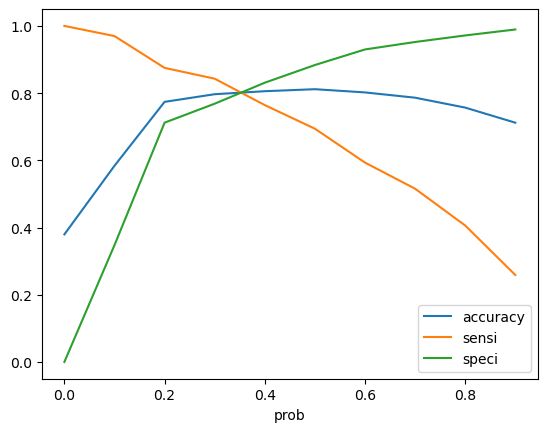

In [95]:
# Plot for accuracy, sensitivity and specifity for various probability
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## We can see from graph that optimal cut off is at 0.35.

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.847632,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.091404,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.043097,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.933280,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.191962,0,1,1,0,0,0,0,0,0,0,0,0


In [97]:
# Checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8049278091650973

In [98]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3164,  789],
       [ 454, 1965]], dtype=int64)

In [99]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("False Positive rate : ",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity :  0.812319140140554
Specificity : 0.8004047558816089
False Positive rate :  0.1995952441183911
Positive Predictive Value : 0.7135076252723311
Negative Predictive Value :  0.8745163073521283


## Prediction on test set

In [101]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [102]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Others,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,-0.103815,1,0,0,0,0,0,0,0,0,0
4050,0,-0.881052,0,1,0,0,0,0,0,0,1,0
7201,1,0.424120,1,0,0,0,0,0,0,0,1,0
1196,0,-0.105648,1,0,0,0,0,0,0,0,0,0
8219,0,-0.428274,1,0,0,0,0,0,0,0,0,0


In [103]:
# Adding a const
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_Others,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,What is your current occupation_Working Professional,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,1.0,0,-0.103815,1,0,0,0,0,0,0,0,0,0
4050,1.0,0,-0.881052,0,1,0,0,0,0,0,0,1,0
7201,1.0,1,0.424120,1,0,0,0,0,0,0,0,1,0
1196,1.0,0,-0.105648,1,0,0,0,0,0,0,0,0,0
8219,1.0,0,-0.428274,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,1.0,0,-0.745402,1,0,0,0,0,0,0,0,1,0
315,1.0,0,-0.217467,0,0,1,0,0,0,0,0,0,0
3766,1.0,0,-0.692242,1,0,0,0,0,0,0,0,0,0
8043,1.0,0,1.124367,0,0,0,1,0,0,0,0,1,0


In [104]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3504,0.170806
4050,0.975402
7201,0.299722
1196,0.170527
8219,0.126925


In [105]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [106]:
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.170806
1,1,0.975402
2,0,0.299722
3,0,0.170527
4,1,0.126925


In [107]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion Probability'})
y_pred_final.head()

,Converted,Conversion Probability
0,0,0.170806
1,1,0.975402
2,0,0.299722
3,0,0.170527
4,1,0.126925


In [108]:
y_pred_final['final_predicted'] = y_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.35 else 0)

In [109]:
y_pred_final.head()

,Converted,Conversion Probability,final_predicted
0,0,0.170806,0
1,1,0.975402,1
2,0,0.299722,0
3,0,0.170527,0
4,1,0.126925,0


In [110]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8103258879531308


In [111]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1357,  332],
       [ 186,  856]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8214971209213052
Specificity : 0.8034339846062759


## Precision and recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3493,  460],
       [ 740, 1679]], dtype=int64)

In [115]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.7849462365591398
Recall : 0.6940884663083919


In [116]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7849462365591398


In [117]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6940884663083919


In [118]:
#Precision and recall tradeoff
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

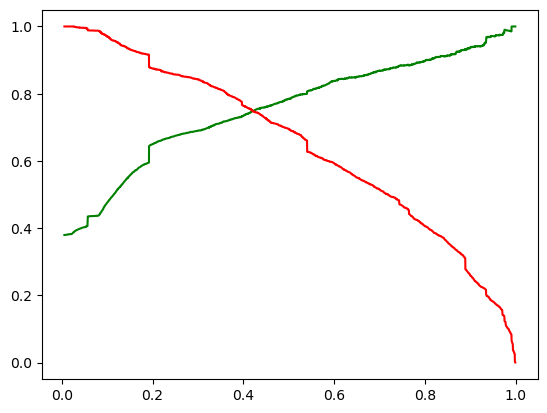

In [120]:
# plot trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
#Assigning lead score
y_pred_final['Lead_Score'] = y_pred_final['Conversion Probability'].map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Conversion Probability,final_predicted,Lead_Score
0,0,0.170806,0,17
1,1,0.975402,1,98
2,0,0.299722,0,30
3,0,0.170527,0,17
4,1,0.126925,0,13


In [122]:
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8103258879531308


In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1357,  332],
       [ 186,  856]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8214971209213052
Specificity : 0.8034339846062759


In [126]:
#Assigning lead score to test data
y_pred_final['Lead_Score'] = y_pred_final['Conversion Probability'].map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Conversion Probability,final_predicted,Lead_Score
0,0,0.170806,0,17
1,1,0.975402,1,98
2,0,0.299722,0,30
3,0,0.170527,0,17
4,1,0.126925,0,13


In [127]:
#Lead score greater than 80 can be termed as hot lead
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Converted,Conversion Probability,final_predicted,Lead_Score
1,1,0.975402,1,98
9,0,0.934743,1,93
23,1,0.990904,1,99
46,1,0.906479,1,91
57,1,0.920932,1,92
...,...,...,...,...
2720,1,0.804229,1,80
2721,1,0.812763,1,81
2724,1,0.797095,1,80
2729,1,0.965570,1,97


In [128]:
#Important  features of our model
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.508819
What is your current occupation_Working Professional    2.609511
Lead Source_Welingak Website                            2.428544
Last Notable Activity_Unreachable                       1.724801
Last Notable Activity_SMS Sent                          1.598867
Last Activity_Other_Activity                            1.544855
Total Time Spent on Website                             1.074090
Lead Source_Olark Chat                                  1.008431
const                                                  -0.481173
Lead Origin_Landing Page Submission                    -0.987248
Specialization_Others                                  -1.018239
Last Activity_Olark Chat Conversation                  -1.379941
Do Not Email                                           -1.434611
dtype: float64

### Train data set evalaution
 - Accuracy : 0.8049278091650973
 - Sensitivity :  0.812319140140554
 - Specificity : 0.8004047558816089
 - False Positive rate :  0.1995952441183911
 - Positive Predictive Value : 0.7135076252723311
 - Negative Predictive Value :  0.8745163073521283

### Test data evaluation
 - Accuracy : 0.8103258879531308
 - Sensitivity : 0.8214971209213052
 - Specificity : 0.8034339846062759

## Observation and recommendation
 - Users spending more time on website are potentially good leads which can be converted
 - Users whose last activity was SMS sent are hot lead and can be converted
 - Company should try to reach out to wokring professionss
 - If users has opeted for do not email, company should not reach out to them as there is very low probability of conversion
 - If lead origin is landing page submission, there are low chance of conversion and company should avoid reaching out to these    users.
 - If lead source is Welingak website, call should be made to these people as there are high chance of conversion
 - When lead origin is Lead add form, those customer should be readched out as there is high chance of converting